In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Title:
BMW Global Sales Analysis

## Description:
This analysis explores BMW’s worldwide sales performance across different regions, markets, and product segments. It highlights year-over-year growth trends, market share distribution, regional strengths, and shifts in consumer demand. The insights help identify key factors driving BMW’s sales success, competitive positioning in the global automotive market, and future opportunities for expansion.

## Import dataset

In [2]:
df = pd.read_csv("BMW sales data (2010-2024) (1).csv")

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [8]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [11]:
df.shape

(50000, 11)

In [12]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

## Data visualizations

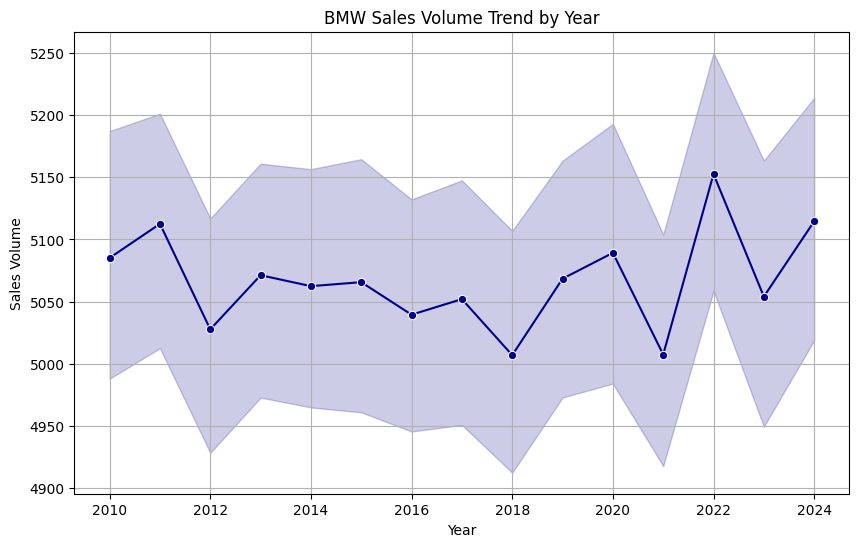

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Sales_Volume", data=df, marker="o", color="darkblue")
plt.title("BMW Sales Volume Trend by Year")
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.grid(True)
plt.show()

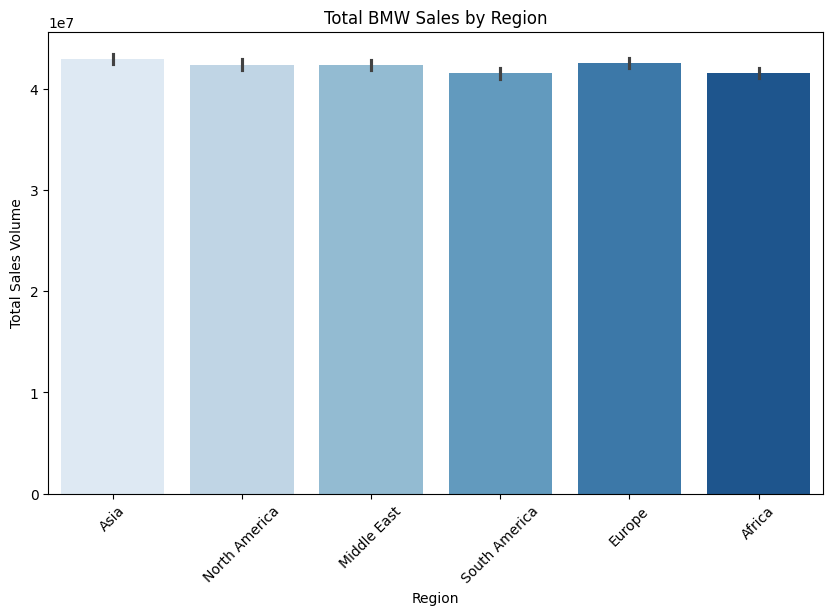

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Sales_Volume", data=df, estimator=sum, palette="Blues")
plt.title("Total BMW Sales by Region")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show()

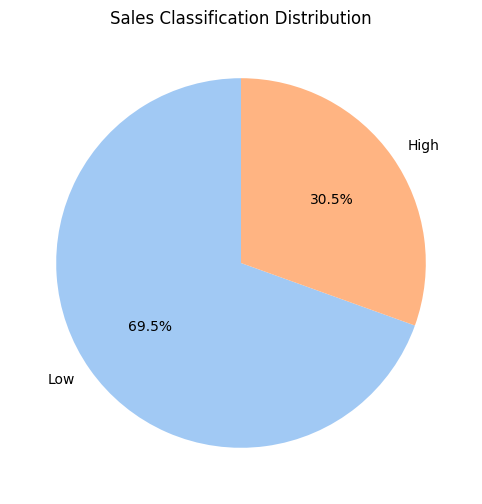

In [15]:
plt.figure(figsize=(8,6))
df["Sales_Classification"].value_counts().plot.pie(autopct="%1.1f%%", 
                                                   colors=sns.color_palette("pastel"), 
                                                   startangle=90)
plt.title("Sales Classification Distribution")
plt.ylabel("")
plt.show()

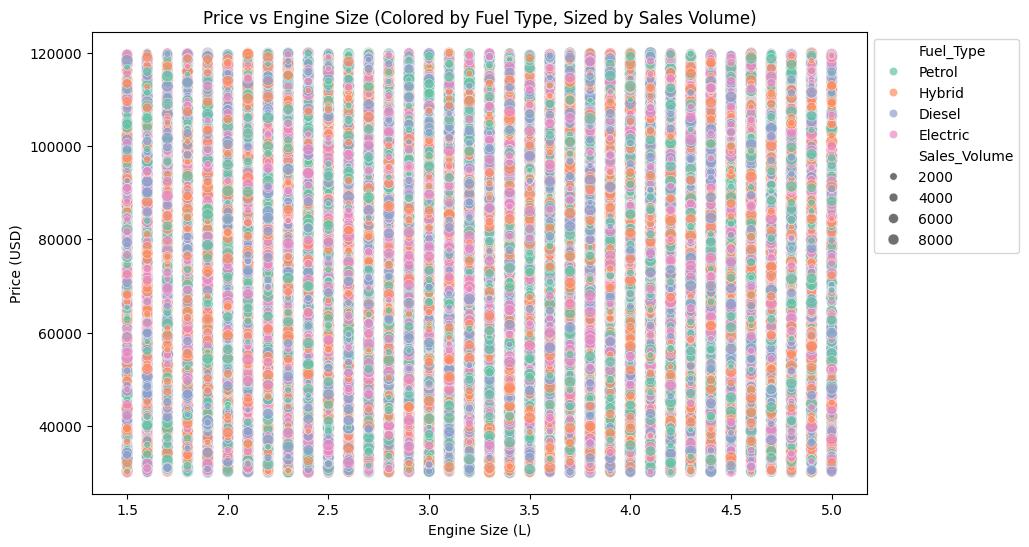

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Engine_Size_L", y="Price_USD", hue="Fuel_Type", size="Sales_Volume",
                data=df, alpha=0.7, palette="Set2")
plt.title("Price vs Engine Size (Colored by Fuel Type, Sized by Sales Volume)")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (USD)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

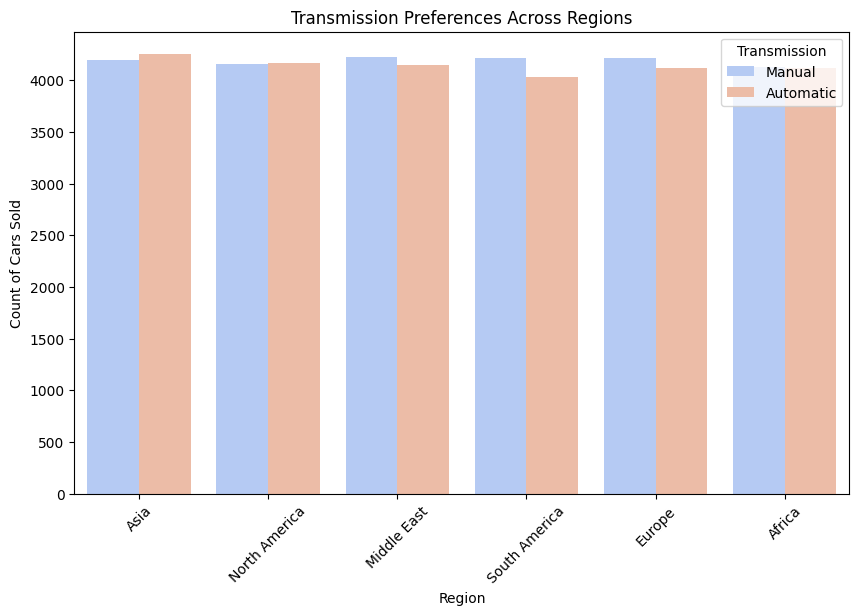

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="Region", hue="Transmission", data=df, palette="coolwarm")
plt.title("Transmission Preferences Across Regions")
plt.ylabel("Count of Cars Sold")
plt.xticks(rotation=45)
plt.show()


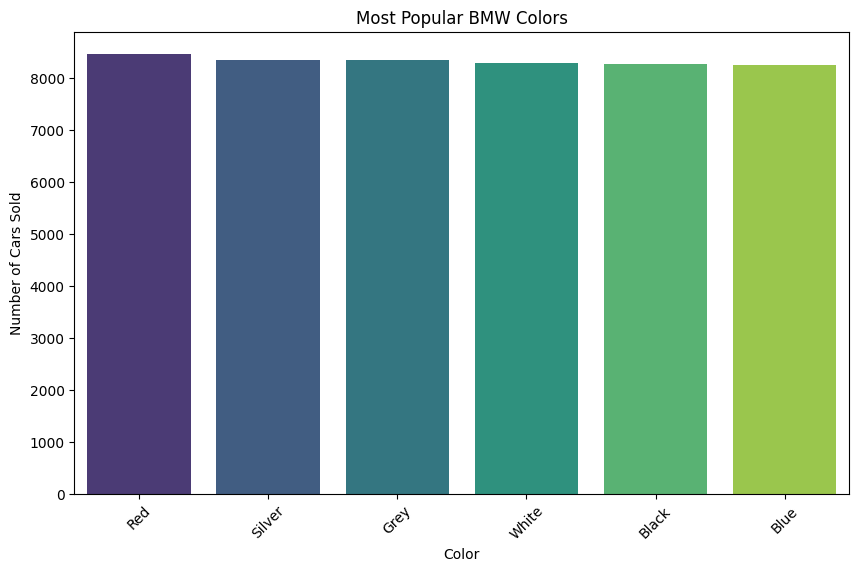

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Color"].value_counts().index, 
            y=df["Color"].value_counts().values, 
            palette="viridis")
plt.title("Most Popular BMW Colors")
plt.ylabel("Number of Cars Sold")
plt.xlabel("Color")
plt.xticks(rotation=45)
plt.show()

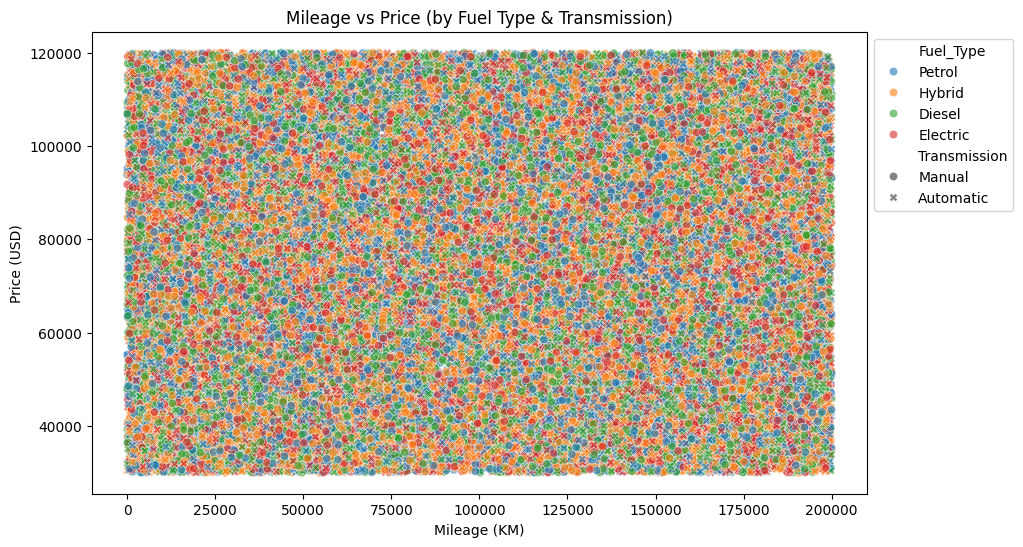

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Mileage_KM", y="Price_USD", hue="Fuel_Type", style="Transmission",
                data=df, alpha=0.6)
plt.title("Mileage vs Price (by Fuel Type & Transmission)")
plt.xlabel("Mileage (KM)")
plt.ylabel("Price (USD)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

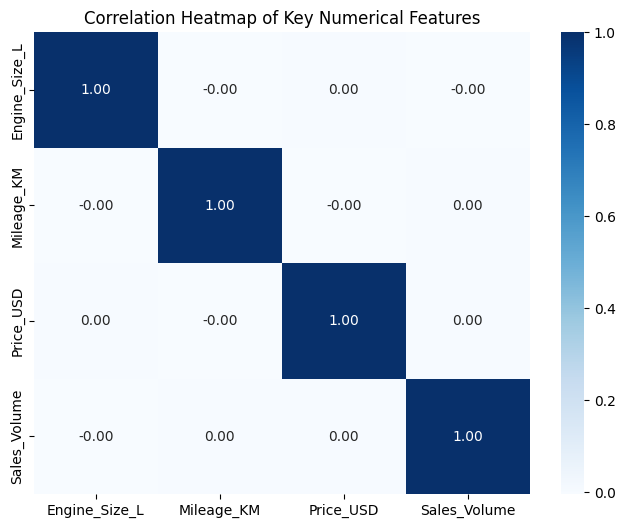

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Engine_Size_L","Mileage_KM","Price_USD","Sales_Volume"]].corr(), 
            annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Key Numerical Features")
plt.show()

## ML Algorithms

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [22]:
df_encoded = df.copy()
le = LabelEncoder()
for col in ["Model", "Region", "Color", "Fuel_Type", "Transmission", "Sales_Classification"]:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [23]:
X = df_encoded.drop("Sales_Classification", axis=1)
y = df_encoded["Sales_Classification"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [26]:
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100  # accuracy in %
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.2f}%")

Logistic Regression: 99.88%
Decision Tree: 100.00%
Random Forest: 100.00%
Gradient Boosting: 100.00%
Support Vector Machine: 99.58%
KNN: 95.77%
XGBoost: 99.97%


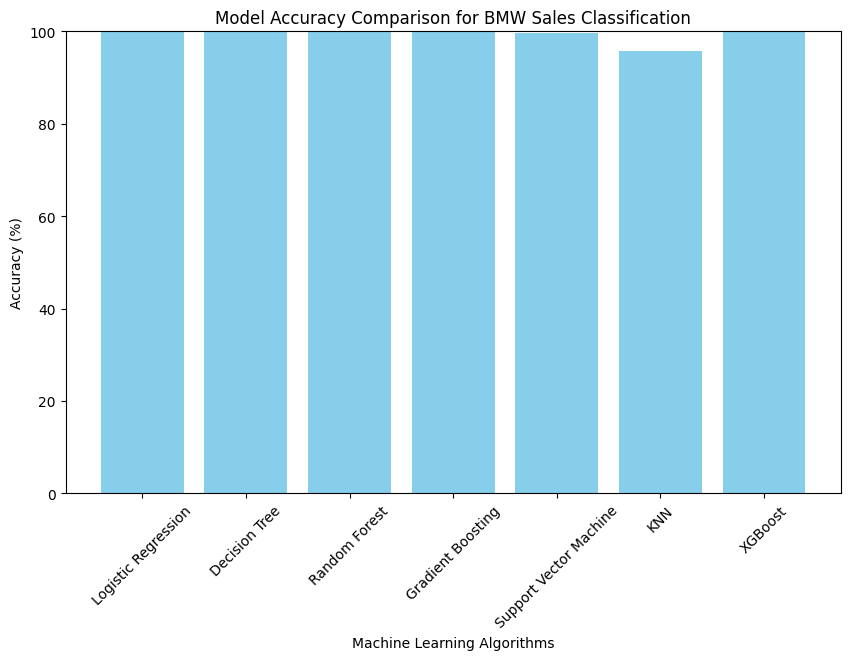

In [27]:
plt.figure(figsize=(10,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color="skyblue")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Algorithms")
plt.title("Model Accuracy Comparison for BMW Sales Classification")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

## Thank you...pls upvote!!